In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [46]:
data = pd.read_csv('ap_6pm.csv')
data.head(6)
#data.dtypes

,Time,Cost
0,09-03-2017,0.0344
1,10-03-2017,0.0334
2,11-03-2017,0.0335
3,12-03-2017,0.0330
4,13-03-2017,0.0326
5,14-03-2017,0.0358


In [47]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv('ap_6pm.csv', parse_dates=['Time'], index_col='Time',date_parser=dateparse)
data.head(5)

,Cost
Time,
2017-03-09,0.0344
2017-03-10,0.0334
2017-03-11,0.0335
2017-03-12,0.0330
2017-03-13,0.0326


In [48]:
data.index

DatetimeIndex(['2017-03-09', '2017-03-10', '2017-03-11', '2017-03-12',
               '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
               '2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20',
               '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
               '2017-03-25', '2017-03-26', '2017-03-27', '2017-03-28',
               '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-01',
               '2017-04-02', '2017-04-03', '2017-04-04', '2017-04-05',
               '2017-04-06', '2017-04-07', '2017-04-08', '2017-04-09',
               '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13',
               '2017-04-14', '2017-04-15', '2017-04-16', '2017-04-17',
               '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21',
               '2017-04-22', '2017-04-23', '2017-04-24', '2017-04-25',
               '2017-04-26', '2017-04-27', '2017-04-28', '2017-04-29',
               '2017-04-30', '2017-05-01', '2017-05-02', '2017-05-03',
      

In [49]:
ts = data['Cost']
ts.head(10)

Time
2017-03-09    0.0344
2017-03-10    0.0334
2017-03-11    0.0335
2017-03-12    0.0330
2017-03-13    0.0326
2017-03-14    0.0358
2017-03-15    0.0338
2017-03-16    0.0325
2017-03-17    0.0335
2017-03-18    0.0325
Name: Cost, dtype: float64

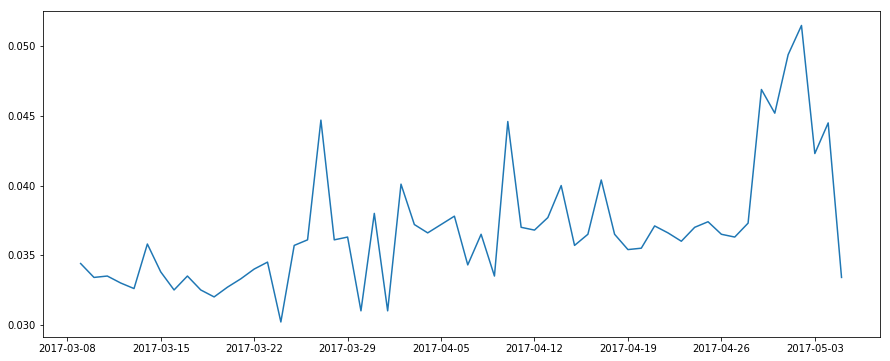

In [50]:
plt.plot(ts)

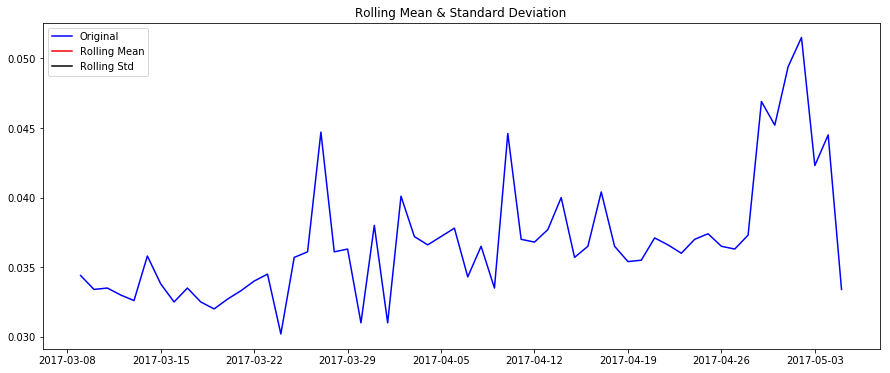

Test Statistic                 -2.776311
p-value                         0.061738
#Lags Used                      2.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64

In [51]:
from statsmodels.tsa.stattools import adfuller
    
    #Determing rolling statistics
#rolmean = pd.rolling_mean(ts, window=12)
#rolstd = pd.rolling_std(ts, window=12)

rolmean = ts.rolling(365).mean()
rolstd = ts.rolling(365).std()

    #Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    #Perform Dickey-Fuller test:
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

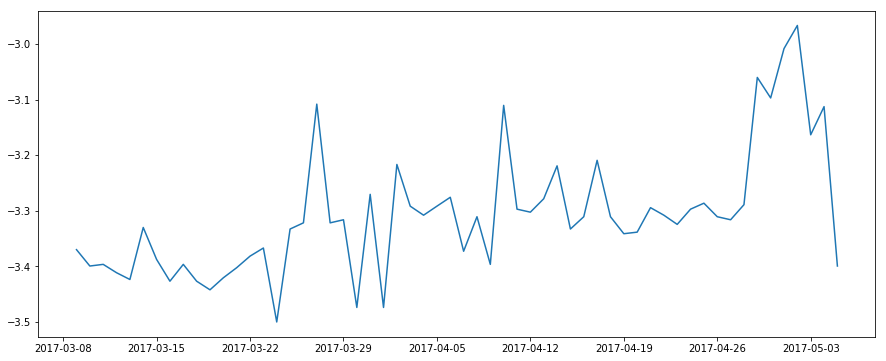

In [52]:
ts_log = np.log(ts)
plt.plot(ts_log)

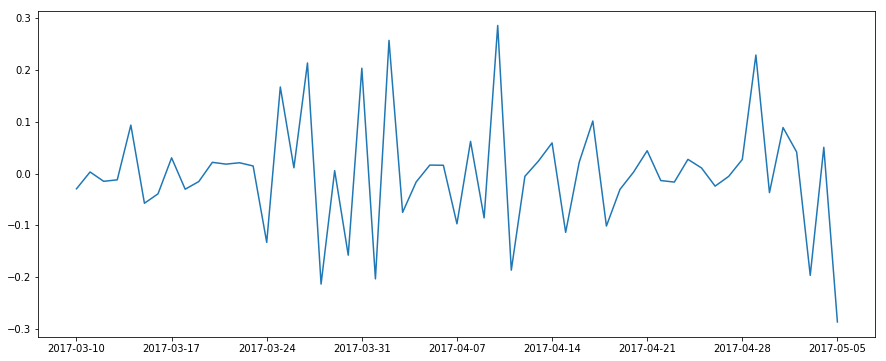

In [53]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

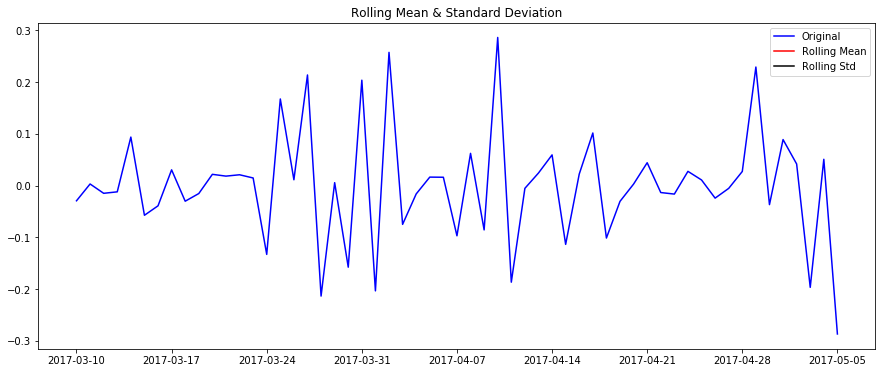

Test Statistic                -1.286550e+01
p-value                        5.005460e-24
#Lags Used                     0.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64

In [54]:
ts_log_diff.dropna(inplace=True)
rolmean = ts_log_diff.rolling(365).mean()
rolstd = ts_log_diff.rolling(365).std()

    #Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    #Perform Dickey-Fuller test:
dftest = adfuller(ts_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

In [55]:
from statsmodels.tsa.stattools import acf, pacf

In [56]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

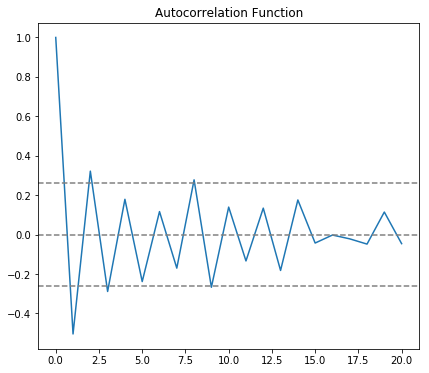

In [57]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

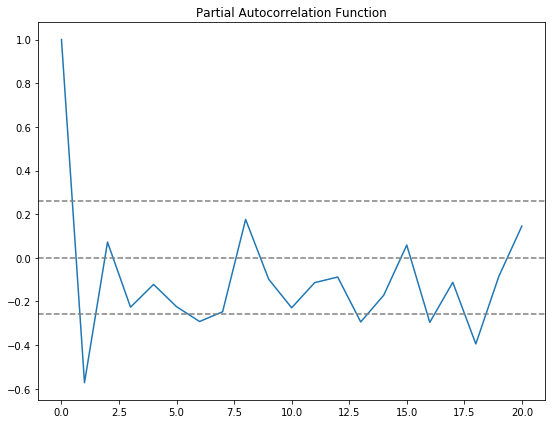

In [58]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [59]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.5015')

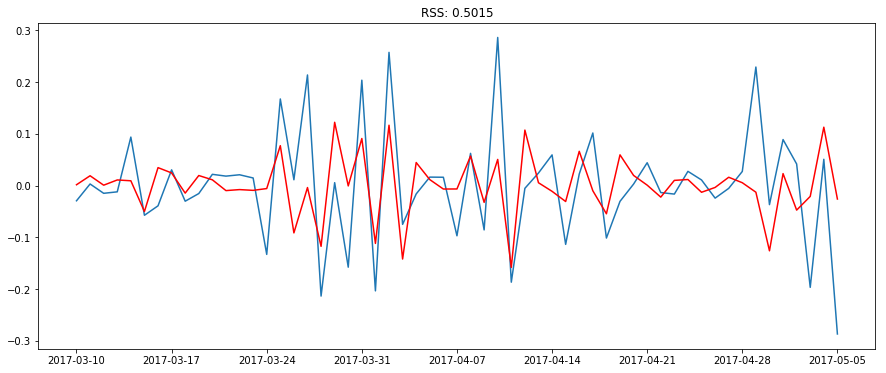

In [60]:
#AR model
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.4758')

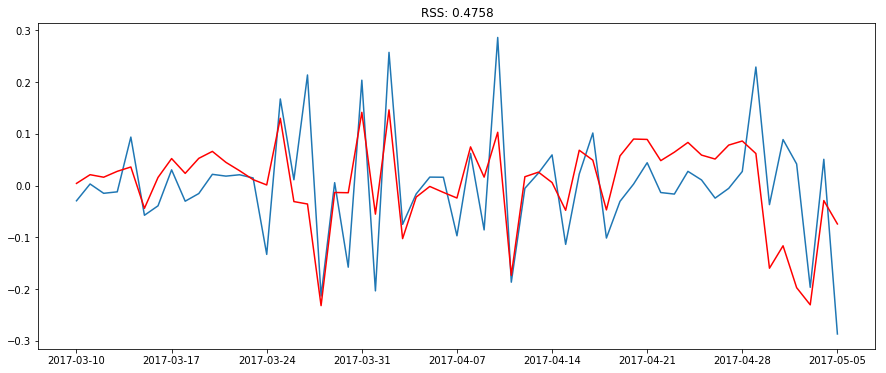

In [61]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.4959')

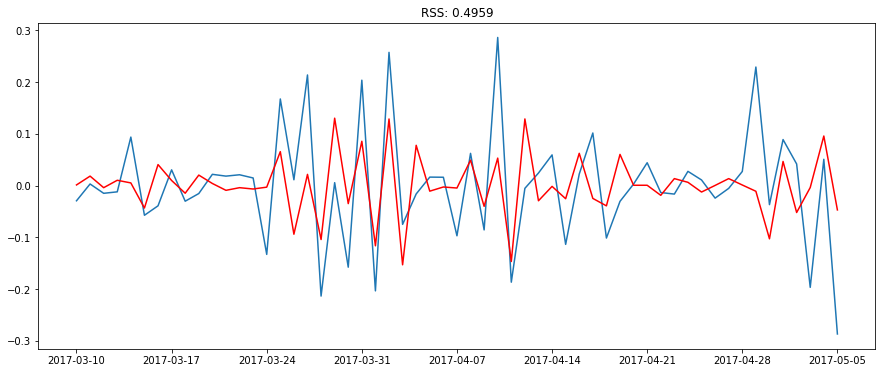

In [62]:
#combined model
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [63]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head(5)



Time
2017-03-10    0.001134
2017-03-11    0.018194
2017-03-12   -0.004153
2017-03-13    0.010150
2017-03-14    0.005034
dtype: float64

In [64]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head(5)

Time
2017-03-10    0.001134
2017-03-11    0.019328
2017-03-12    0.015175
2017-03-13    0.025325
2017-03-14    0.030359
dtype: float64

In [65]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(5)

C:\Users\Piyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Time
2017-03-09   -3.369699
2017-03-10   -3.368565
2017-03-11   -3.350371
2017-03-12   -3.354524
2017-03-13   -3.344374
dtype: float64

Text(0.5,1,'RMSE: 0.0051')

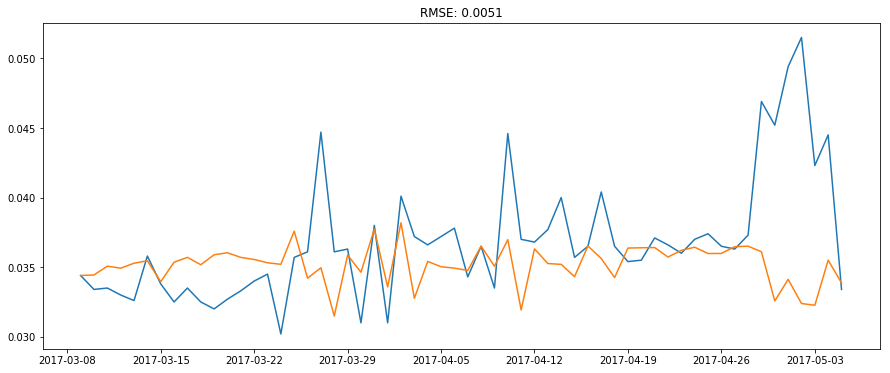

In [66]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [68]:
predictions_ARIMA.head

<bound method NDFrame.head of Time
2017-03-09    0.034400
2017-03-10    0.034439
2017-03-11    0.035071
2017-03-12    0.034926
2017-03-13    0.035282
2017-03-14    0.035460
2017-03-15    0.033952
2017-03-16    0.035356
2017-03-17    0.035702
2017-03-18    0.035175
2017-03-19    0.035891
2017-03-20    0.036033
2017-03-21    0.035701
2017-03-22    0.035553
2017-03-23    0.035314
2017-03-24    0.035204
2017-03-25    0.037587
2017-03-26    0.034210
2017-03-27    0.034956
2017-03-28    0.031491
2017-03-29    0.035869
2017-03-30    0.034636
2017-03-31    0.037729
2017-04-01    0.033580
2017-04-02    0.038189
2017-04-03    0.032764
2017-04-04    0.035413
2017-04-05    0.035029
2017-04-06    0.034931
2017-04-07    0.034763
2017-04-08    0.036509
2017-04-09    0.035068
2017-04-10    0.036977
2017-04-11    0.031927
2017-04-12    0.036313
2017-04-13    0.035259
2017-04-14    0.035201
2017-04-15    0.034315
2017-04-16    0.036520
2017-04-17    0.035622
2017-04-18    0.034249
2017-04-19    0.036373